In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))


import pandas as pd
from hydra.model.force_encoder_ecto import ForceEncoderEcto
from hydra.model.force_encoder_endo import ForceEncoderEndo
import hydra.model.helper as helper

In [2]:
# Encode the calium into force

FILENAME = "2020-06-01-19-38-45-405549"

encoder = ForceEncoderEndo

calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), 200, 200)
calcium = calcium[::5, :, :] # Slice calcium
force = helper.encode_force_2d(encoder, calcium, 200, 200, 0.02, save_interval=1)

100%|██████████████████████████████████████████████████████████████████████████████| 3500/3500 [00:48<00:00, 71.62it/s]


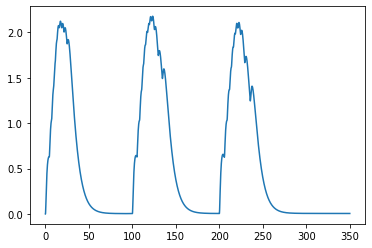

In [7]:
# Test on one cell
force_single = ForceEncoderEcto.encode(calcium[:, 0, 0], 0.02)
plt.plot(np.arange(0,350,0.02), force_single)
plt.show()

In [8]:
# Average the force and save
force_averaged = helper.average_force(force, 200, 200)
df = pd.DataFrame(force_averaged.reshape(-1, 400))
df.to_csv("./results/data/force/" + FILENAME + ".csv", index = False)
del force

100%|█████████████████████████████████████████████████████████████████████████████| 3500/3500 [00:05<00:00, 666.78it/s]


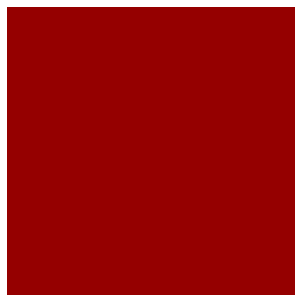

In [3]:
from tqdm import tqdm
import cv2
data = force
numx = 200
numy = 200
dpi = 50
fps = 200
savepath = './results/video/force/'

plt.figure(figsize=(numx/dpi, numy/dpi))

for iframe in tqdm(range(len(data))):

    plt.clf()

    frame = data[iframe]
    # if flip:
    #     frame = np.flip(frame.T, 0)

    plt.imshow(frame.T, cmap='hot', vmin=0, vmax=4)

    plt.axis('off')

    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

    plt.xlim(0, numx)
    plt.ylim(0, numy)
    plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)
    plt.margins(0, 0)

    plt.savefig(savepath + 'frames/img' + str(iframe) + '.jpg', dpi=dpi)

# Save video
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
videoWriter = cv2.VideoWriter(savepath + '/video.avi', fourcc, fps, (numx, numy))

for iframe in tqdm(range(len(data))):
    frame = cv2.imread(savepath + 'frames/img' + str(iframe) + '.jpg')
    videoWriter.write(frame)
videoWriter.release()
cv2.destroyAllWindows()